In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import tensorflow as tf

# from tensorflow import keras
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [119]:
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False)
#print(mnist.DESCR)


In [120]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)
print(X.shape)

(70000, 784)


In [123]:
# Taking less data to speed up training. 
X_train = X[:50000]
y_train = y[:50000]
X_val = X[50000:60000]
y_val = y[50000:60000]
X_test = X[60000:70000]
y_test = y[60000:70000]


Sanna värdet: 1
(50000, 784)
(50000,)


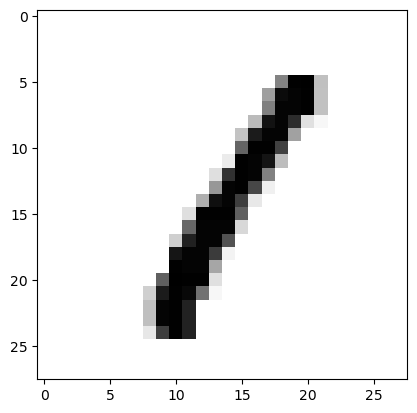

In [125]:
# Plottar X, genom variabeln "nummer"
nummer = int(3)
plt.imshow(X[nummer].reshape(28, 28), cmap=plt.get_cmap("binary"))
print("Sanna värdet:", y[nummer])

# Kanske inte behövs
print(X_train.shape)
print(y_train.shape)

In [127]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
# en funktion för confusion matrix

In [129]:
lin_clf = LinearSVC(random_state = 42)

In [131]:
# Förbereder data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Only transforming the validation data. 
X_test_scaled = scaler.transform(X_test)  # Only transforming the test data. 

X_train_flat = X_train.reshape(len(X_train), -1)  # Flatten till random forest
X_val_flat = X_val.reshape(len(X_val), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# X_train_ann = X_train / 255.0
# X_val_ann = X_val / 255.0
# X_test_ann = X_test / 255.0

In [133]:
# Tränar random forest
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train_flat, y_train)  # Tränar random forest

RandomForestClassifier(n_estimators=500, random_state=42)

In [134]:
# Tränar SVM
svm_model = svm.SVC(kernel='rbf', C=10)
svm_model.fit(X_train_scaled, y_train)  # Tränar SVM

SVC(C=10)

In [135]:
# Bygg och träna ett enkelt neuralt nätverk
# ann_model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

# ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# ann_model.fit(X_train_ann, y_train, epochs=5, validation_split=0.1)

In [140]:
# Utvärdera modellerna
svm_pred = svm_model.predict(X_val_scaled)
svm_acc = accuracy_score(y_val, svm_pred)
print(f'SVM Accuracy: {svm_acc * 100:.2f}%')

rf_pred = rf_model.predict(X_val_flat)
rf_acc = accuracy_score(y_val, rf_pred)
print(f'Random Forest Accuracy: {rf_acc *nö 100:.2f}%')

# ann_loss, ann_acc = ann_model.evaluate(X_val_ann, y_test)
# print(f'ANN Accuracy: {ann_acc * 100:.2f}%')

SVM Accuracy: 97.49%
Random Forest Accuracy: 97.44%


Sanna värdet: 5


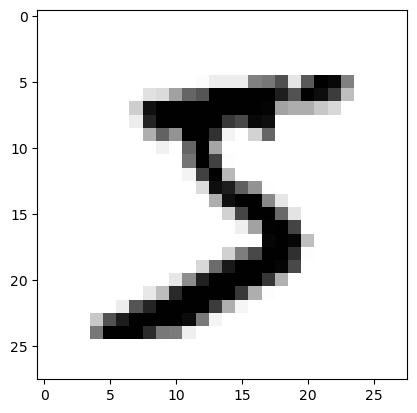

In [142]:
plt.imshow(X[0].reshape(28, 28), cmap=plt.get_cmap("binary"))
print("Sanna värdet:", y[0])

In [144]:
# Felsökning
# Testar om arrayen för random forest innehåller värden och om de har nan-värden
print(X_train_flat.shape, X_val_flat.shape)
print("nästa")
print(np.isnan(X_train_flat).sum(), np.isnan(X_val_flat).sum())

# Testar om labels är heltal
print(y_train.dtype, y_val.dtype, y_test.dtype)



(50000, 784) (10000, 784)
nästa
0 0
uint8 uint8 uint8


In [105]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=300, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_flat, y_train)
xgb_pred = xgb_model.predict(X_val_flat)
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f'XGBoost Accuracy: {xgb_acc * 100:.2f}%')


C:\Users\Alvin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:31:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 7.90%
